In [179]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.special import boxcox1p
import pickle
from os import path
import statsmodels.api as sm

# data Visualization
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.express as px 
from plotnine import ggplot, aes, geom_line, geom_point, facet_wrap, theme
import plotly.graph_objects as go
# Machine learning algorithms and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import bayesian_search_forecaster
from lightgbm import LGBMRegressor
# Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [180]:
features = pd.read_csv('Resources/features.csv')
stores = pd.read_csv("Resources/stores.csv")
train = pd.read_csv("Resources/train.csv")
df = pd.read_csv('Resources/walmart-sales-dataset-of-45stores.csv')

In [181]:
features.shape

(8190, 12)

In [182]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [183]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [184]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [185]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [186]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Dealing with missing values on the features dataset

In [188]:

features = features.fillna({"CPI": features["CPI"].median()})
features = features.fillna({"Unemployment": features["Unemployment"].median()})

In [189]:
for i in range(1, 6):
    features.loc[:, "MarkDown" + str(i)] = (
        features["MarkDown" + str(i)]
        .mask(features["MarkDown" + str(i)] < 0, 0)
        .fillna(0)
    )

In [190]:
# confirming we do not have any missing values.
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


Combining the training dataset with the features dataset using merge.

In [191]:
data = pd.merge(train, stores, on="Store", how="left")

In [192]:
data = pd.merge(data, features, on=["Store", "Date"], how="left")

In [193]:
data["Date"] = pd.to_datetime(data["Date"])

In [194]:
data.sort_values(by=["Date"], inplace=True)

In [195]:
data.set_index(data.Date, inplace=True)

In [196]:
data["IsHoliday_x"].isin(data["IsHoliday_y"]).all()

True

In [197]:
data.drop(columns="IsHoliday_x", inplace=True)
data.rename(columns={"IsHoliday_y": "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

In [198]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


Seperating out the date columns

In [199]:
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month
data["Week"] = data["Date"].dt.isocalendar().week

In [200]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5


Looking for outliers and bad data

In [201]:
agg_data = (
    data.groupby(["Store", "Dept"])
    .Weekly_Sales.agg(["max", "min", "mean", "median", "std"])
    .reset_index()
)
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [202]:
store_data = pd.merge(left=data, right=agg_data, on=["Store", "Dept"], how="left")
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

In [203]:
data["Date"] = pd.to_datetime(data["Date"])
data.sort_values(by=["Date"], inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,...,6.299,False,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095


In [204]:
data["Total_MarkDown"] = (
    data["MarkDown1"]
    + data["MarkDown2"]
    + data["MarkDown3"]
    + data["MarkDown4"]
    + data["MarkDown5"]
)
data.drop(
    ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"],
    axis=1,
    inplace=True,
)

In [205]:
numeric_col = [
    "Weekly_Sales",
    "Size",
    "Temperature",
    "Fuel_Price",
    "CPI",
    "Unemployment",
    "Total_MarkDown",
]
data_numeric = data[numeric_col].copy()

In [206]:
data.shape

(421533, 20)

In [207]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis=1)]
data.shape

(375438, 20)

/Users/silas/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


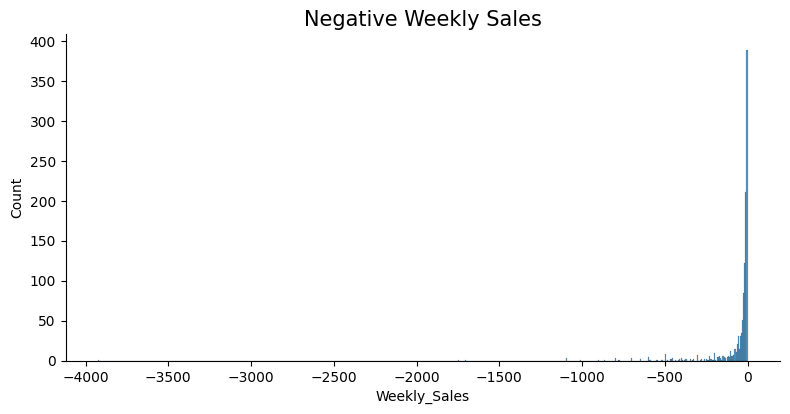

In [208]:
y = data["Weekly_Sales"][data.Weekly_Sales < 0]
sns.displot(y, height=4, aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
#plt.savefig("plots/negative_weekly_sales.png")
plt.show()

In [209]:
data = data[data["Weekly_Sales"] >= 0]

In [210]:
data.shape

(374247, 20)

In [211]:
data["IsHoliday"] = data["IsHoliday"].astype("int")

In [212]:
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.480,9854.349032,0.00
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,766.93,-9.92,372.655556,371.050,290.954675,0.00
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,2512.14,110.56,876.629441,824.040,307.436056,0.00
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,11990.43,7414.43,9188.915105,9161.970,756.223236,0.00
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,29166.26,4791.74,8607.050490,7571.600,3874.176095,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2,26,2012-10-26,9258.88,A,202307,69.79,3.506,223.078337,6.170,0,2012,10,43,19679.04,4179.99,9347.725105,8762.990,2825.107609,9678.80
2012-10-26,38,23,2012-10-26,53.12,C,39690,65.95,4.301,131.193097,10.199,0,2012,10,43,289.78,3.50,37.848679,31.365,34.065601,502.88
2012-10-26,27,6,2012-10-26,5339.65,A,204184,58.99,4.071,142.762411,8.000,0,2012,10,43,41005.33,2524.01,7730.729091,6798.780,5178.928257,10969.27


In [213]:
data.to_csv("./Resources/preprocessed_data.csv")

Visualizing the data

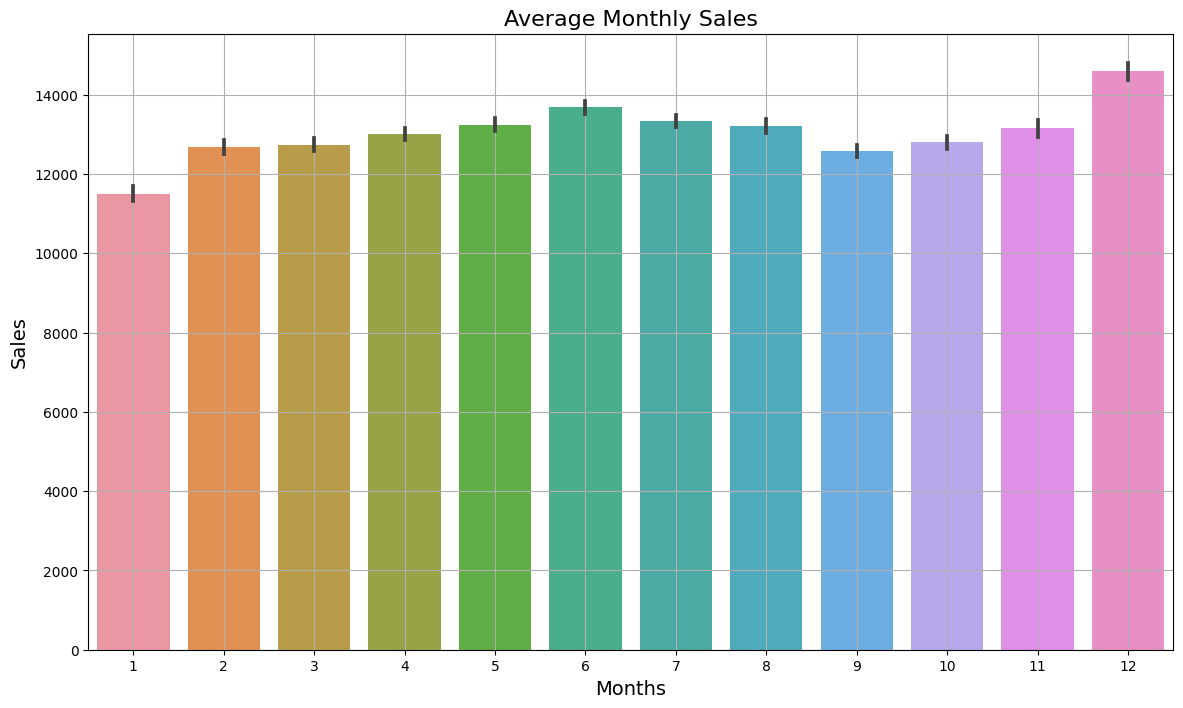

In [214]:
plt.figure(figsize=(14, 8))
sns.barplot(x="Month", y="Weekly_Sales", data=data)
plt.ylabel("Sales", fontsize=14)
plt.xlabel("Months", fontsize=14)
plt.title("Average Monthly Sales", fontsize=16)
#plt.savefig("plots/avg_monthly_sales.png")
plt.grid()

Sales by Month for each year.

In [215]:
data_monthly = pd.crosstab(
    data["Year"], data["Month"], values=data["Weekly_Sales"], aggfunc="sum"
)
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.365986e+08,1.369976e+08,1.753251e+08,1.422677e+08,1.455770e+08,1.776954e+08,1.426176e+08,1.344151e+08,1.687452e+08,1.440445e+08,1.927286e+08
2011,1.170809e+08,1.320987e+08,1.341586e+08,1.710181e+08,1.382097e+08,1.441182e+08,1.762046e+08,1.398143e+08,1.668033e+08,1.375280e+08,1.034907e+08,1.597524e+08
2012,1.172222e+08,8.915290e+07,1.734250e+08,1.479222e+08,1.512280e+08,1.902330e+08,1.458221e+08,1.636039e+08,1.432228e+08,1.480537e+08,NaN,NaN


/Users/silas/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/Users/silas/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/Users/silas/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/Users/silas/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/Users/silas/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py

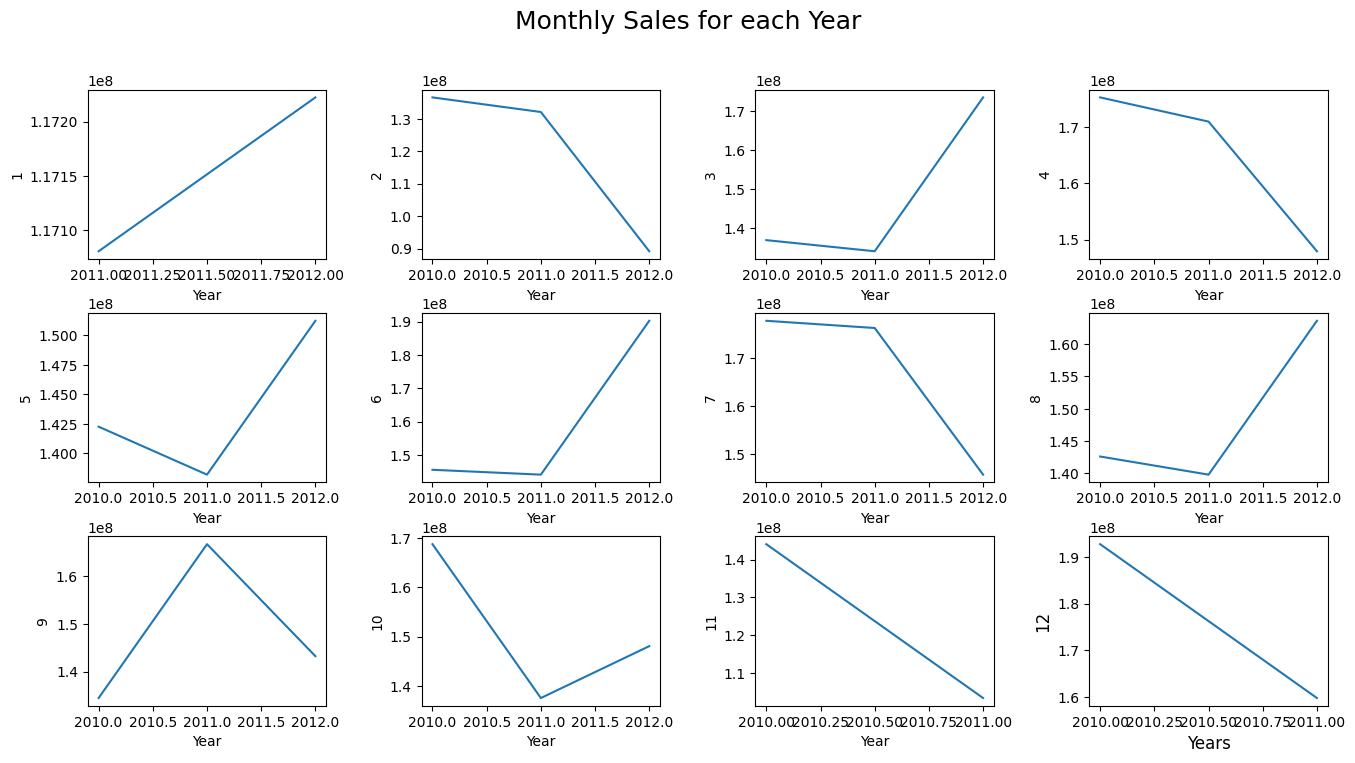

In [216]:
fig, axes = plt.subplots(3, 4, figsize=(16, 8))
plt.suptitle("Monthly Sales for each Year", fontsize=18)
k = 1
for i in range(3):
    for j in range(4):
        sns.lineplot(ax=axes[i, j], data=data_monthly[k])
        plt.subplots_adjust(wspace=0.4, hspace=0.32)
        plt.ylabel(k, fontsize=12)
        plt.xlabel("Years", fontsize=12)
        k += 1

#plt.savefig("plots/monthly_sales_every_year.png")
plt.show()

KeyError: 0

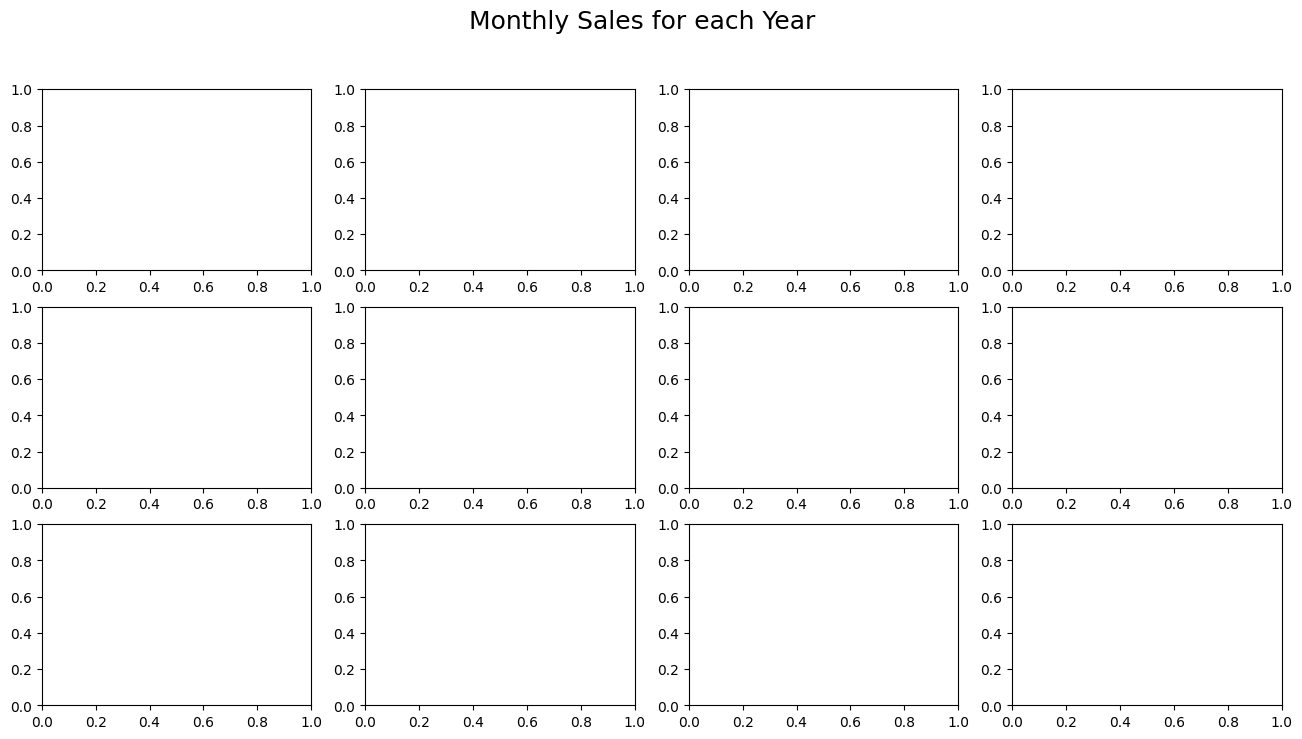

In [217]:
fig, axes = plt.subplots(3, 4, figsize=(16, 8))
plt.suptitle("Monthly Sales for each Year", fontsize=18)

k = 0
for i in range(3):
    for j in range(4):
        if k < len(data_monthly):
            sns.lineplot(ax=axes[i, j], data=data_monthly[k])
            axes[i, j].set_ylabel("Sales", fontsize=12)
            axes[i, j].set_xlabel("Years", fontsize=12)
            axes[i, j].set_title(f"Month {k +1}")
            k += 1

plt.subplots_adjust(wspace=0.4, hspace=0.32)
plt.show()

Avg Weekly Sales by Store 

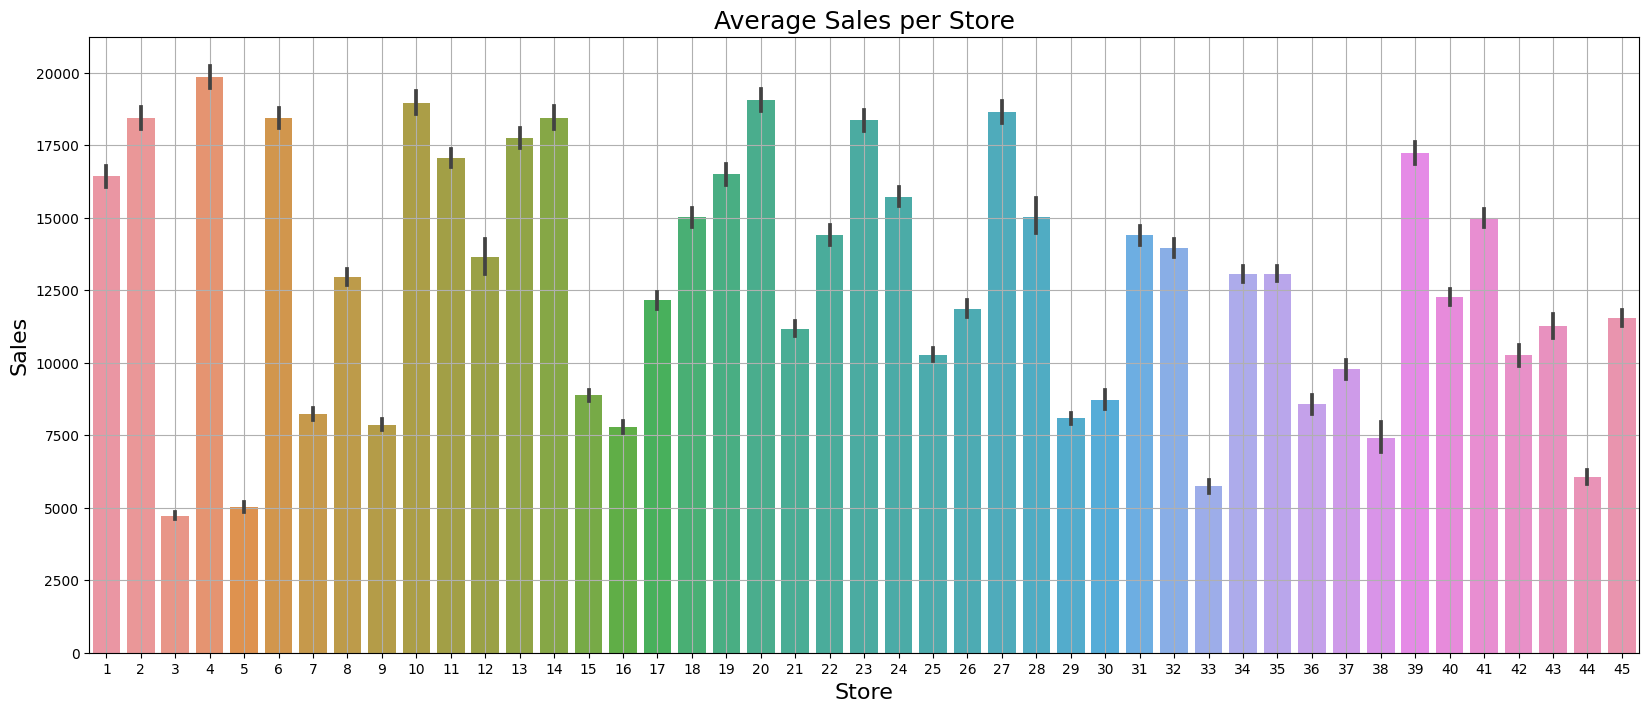

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Store", y="Weekly_Sales", data=data)
plt.grid()
plt.title("Average Sales per Store", fontsize=18)
plt.ylabel("Sales", fontsize=16)
plt.xlabel("Store", fontsize=16)
#plt.savefig("plots/avg_sales_store.png")
plt.show()

Avg sales by department

In [ ]:
# # Create the "Plots" directory if it doesn't exist
# if not os.path.exists("Plots"):
#     os.makedirs("Plots")

# # Save the plot with the correct file path
# plt.savefig("Plots/avg_sales_dept.png")
# plt.show()

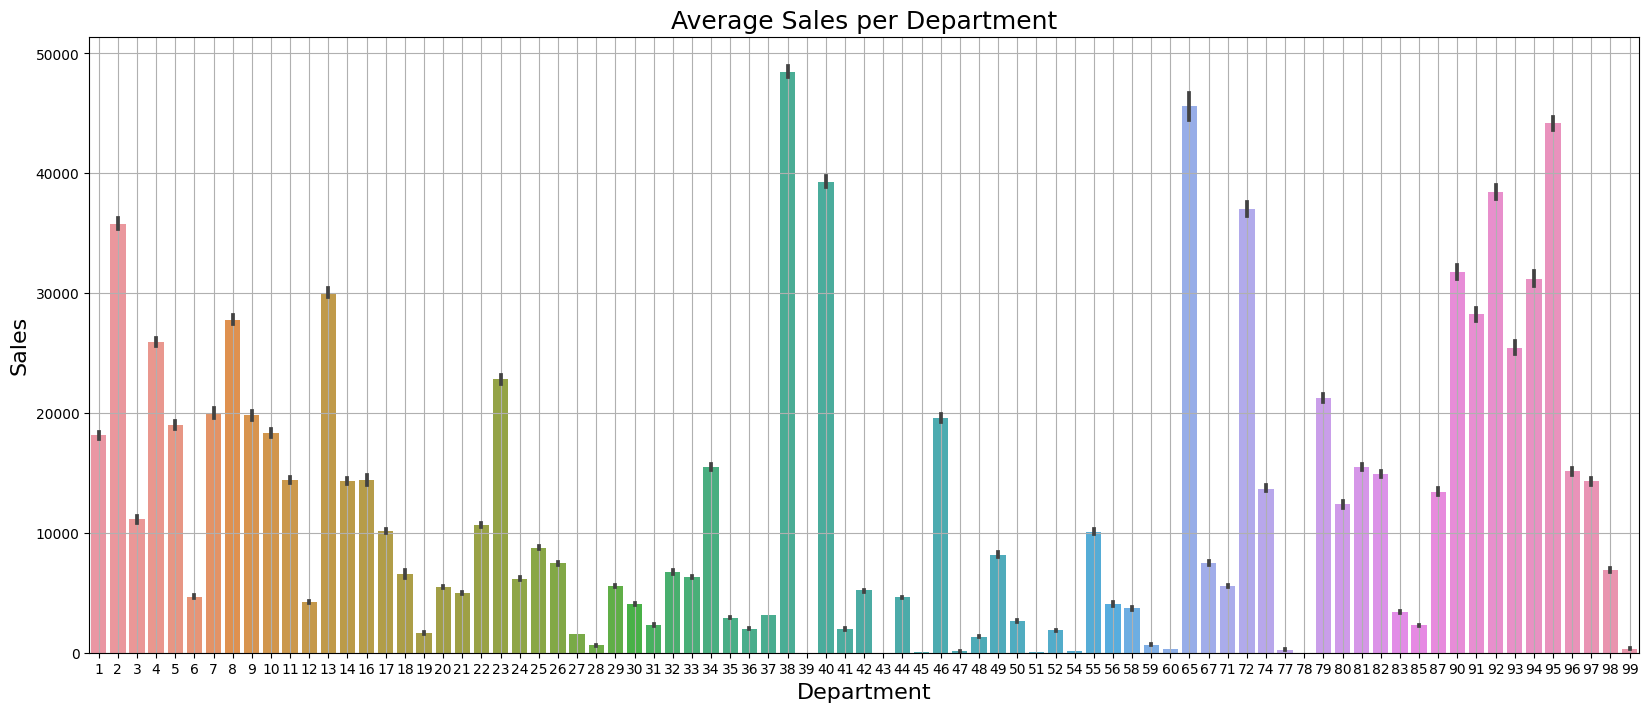

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Dept", y="Weekly_Sales", data=data)
plt.grid()
plt.title("Average Sales per Department", fontsize=18)
plt.ylabel("Sales", fontsize=16)
plt.xlabel("Department", fontsize=16)
#plt.savefig("Plots/avg_sales_dept.png")
plt.show()

Sales vs Temp

/var/folders/0d/lmnzb0d91rlc690fnc9cb4hw0000gq/T/ipykernel_21867/3948647904.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

/Users/silas/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


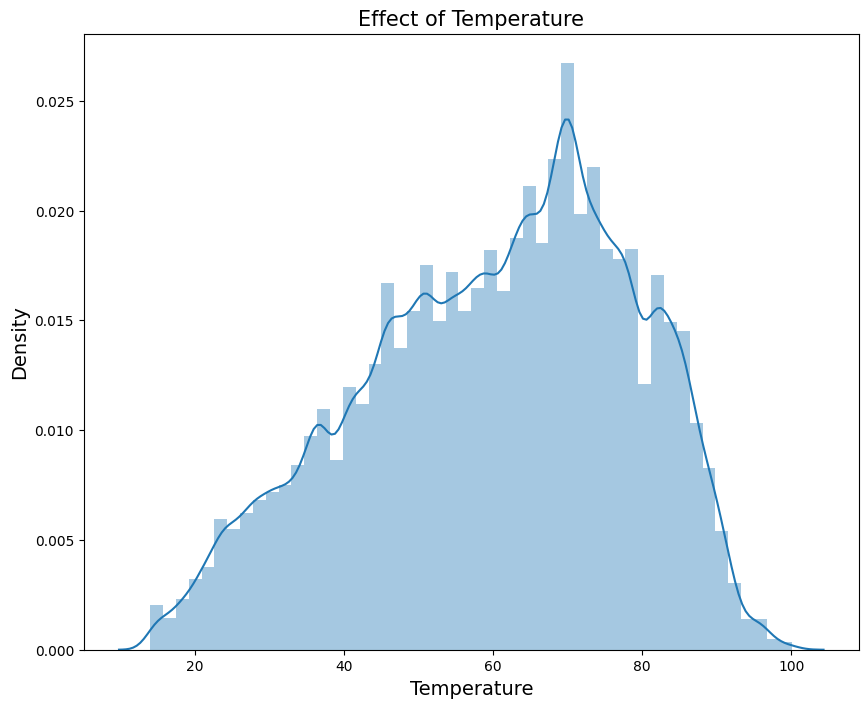

In [ ]:
plt.figure(figsize=(10, 8))
sns.distplot(data["Temperature"])
plt.title("Effect of Temperature", fontsize=15)
plt.xlabel("Temperature", fontsize=14)
plt.ylabel("Density", fontsize=14)
#plt.savefig("plots/effect_of_temp.png")
plt.show()

Holidays

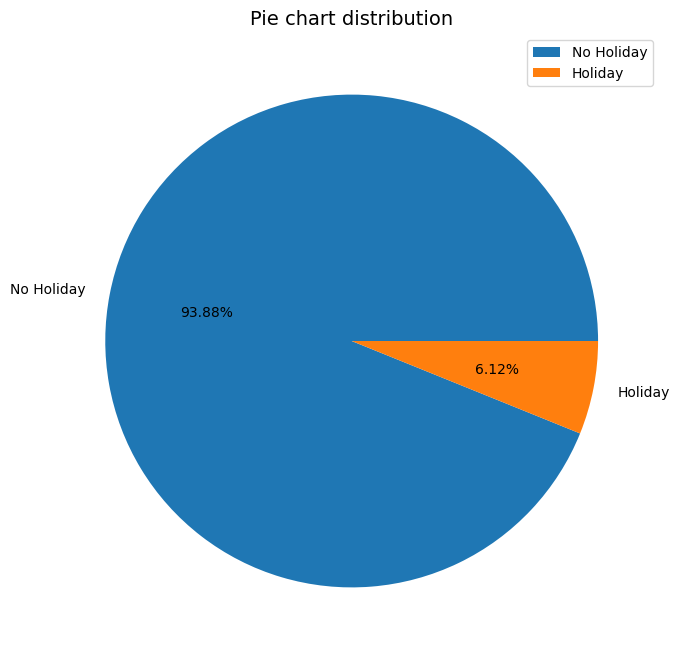

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(
    data["IsHoliday"].value_counts(),
    labels=["No Holiday", "Holiday"],
    autopct="%0.2f%%",
)
plt.title("Pie chart distribution", fontsize=14)
plt.legend()
#plt.savefig("plots/holiday_distribution.png")
plt.show()

Time Series Decomposition

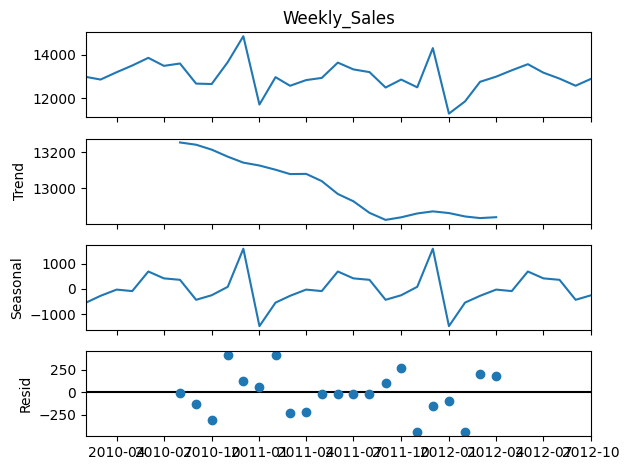

In [218]:
sm.tsa.seasonal_decompose(
    data["Weekly_Sales"].resample("MS").mean(), model="additive"
).plot()
#plt.savefig("plots/seasonal_decompose.png")
plt.show()

In [ ]:
Using one hot encoding to convert categorical data to numerical data

In [237]:
cat_col = ["Store", "Dept", "Type"]
data_cat = data[cat_col].copy()

In [238]:
data_cat.tail()

,Store,Dept,Type
Date,,,
2012-10-26,2,26,A
2012-10-26,38,23,C
2012-10-26,27,6,A
2012-10-26,36,40,A
2012-10-26,45,98,B


In [239]:

data_cat = pd.get_dummies(data_cat, columns=cat_col, dtype=int)

data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [240]:
data = pd.concat([data, data_cat], axis=1)

In [241]:
data.drop(columns=cat_col, inplace=True)

In [242]:
data.drop(columns=["Date"], inplace=True)

Normalizing the data

In [243]:
num_col = [
    "Weekly_Sales",
    "Size",
    "Temperature",
    "Fuel_Price",
    "CPI",
    "Unemployment",
    "Total_MarkDown",
    "max",
    "min",
    "mean",
    "median",
    "std",
]

In [244]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))


def normalization(df, col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = minmax_scale.fit_transform(arr.reshape(len(arr), 1))
    return df

In [245]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


In [246]:
data = normalization(data.copy(), num_col)

In [247]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.342576,0.630267,0.328495,0.0501,0.840500,0.508787,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.009188,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0.009537,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.118953,0.650636,0.233627,0.0501,0.873861,0.291286,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.152888,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


Correlations 

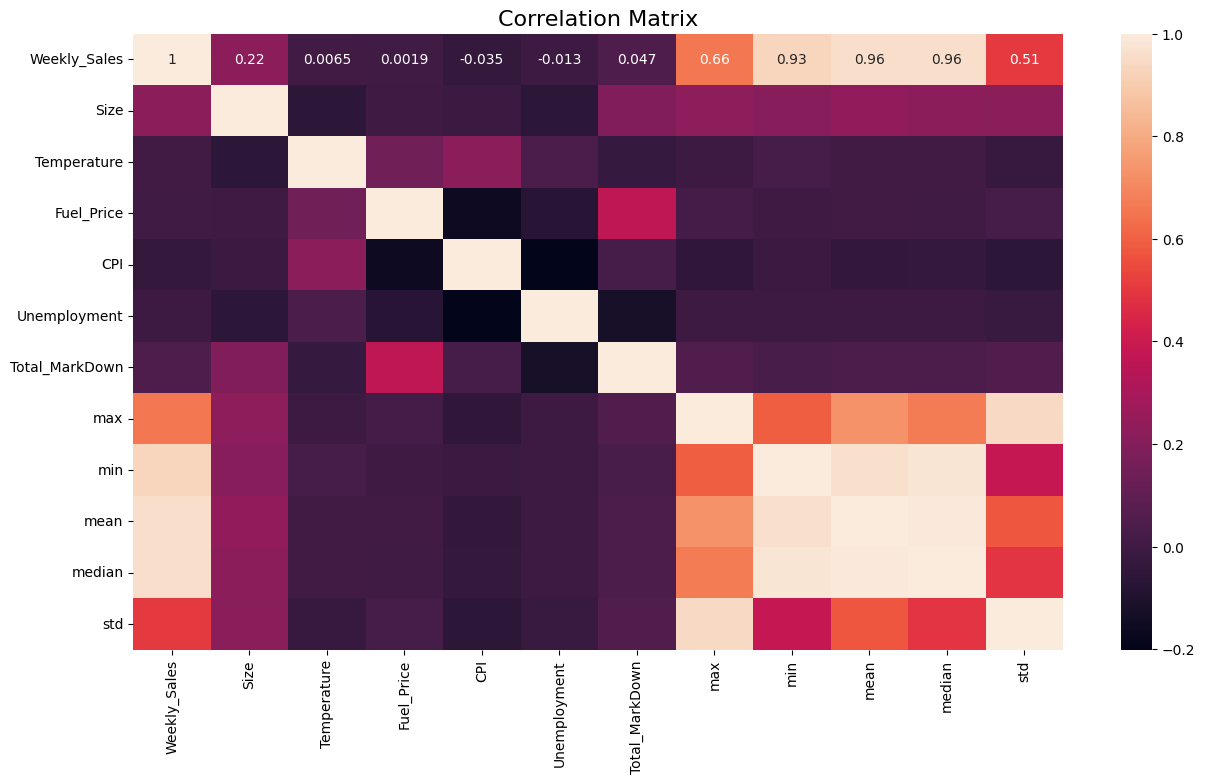

In [249]:
plt.figure(figsize=(15, 8))
corr = data[num_col].corr()
sns.heatmap(corr, vmax=1.0, annot=True)
plt.title("Correlation Matrix", fontsize=16)
#plt.savefig("plots/correlation_matrix.png")
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

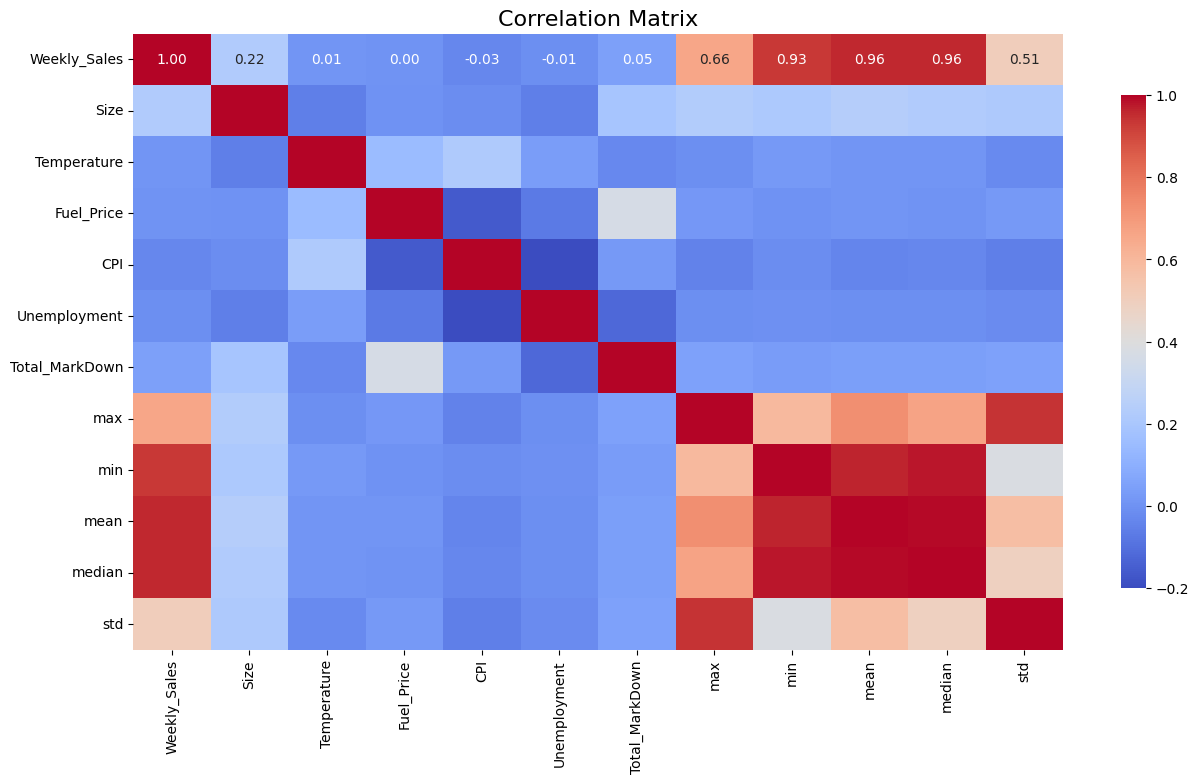

In [250]:
plt.figure(figsize=(15, 8))
sns.heatmap(
    corr, vmax=1.0, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix", fontsize=16)